#**How coefficients are affected?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [12]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [16]:
coefs = []
r2_scores = []
alphas = [0,0.1,1,10]

for i in alphas:
  L = Lasso(alpha=i)
  L.fit(X_train,y_train)
  coefs.append(L.coef_)
  ypreds = L.predict(X_valid)
  r2_scores.append(r2_score(y_valid,ypreds))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [17]:
print(coefs)
print(r2_scores)

[array([  37.90402138, -241.9643623 ,  542.42875865,  347.70384387,
       -931.4888382 ,  518.06227103,  163.41997955,  275.31790052,
        736.19885599,   48.67065746]), array([   0.        , -152.66477923,  552.69777529,  303.36515791,
        -81.36500664,   -0.        , -229.25577639,    0.        ,
        447.91952518,   29.64261704]), array([  0.        ,  -0.        , 413.43184792,  34.83051518,
         0.        ,   0.        ,  -0.        ,   0.        ,
       258.15289363,   0.        ]), array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])]
[0.45260276304361946, 0.4718547867276227, 0.3575918767219115, -0.011962984778542296]


Text(0.5, 1.0, 'Alpha=10 r2_score=-0.011962984778542296')

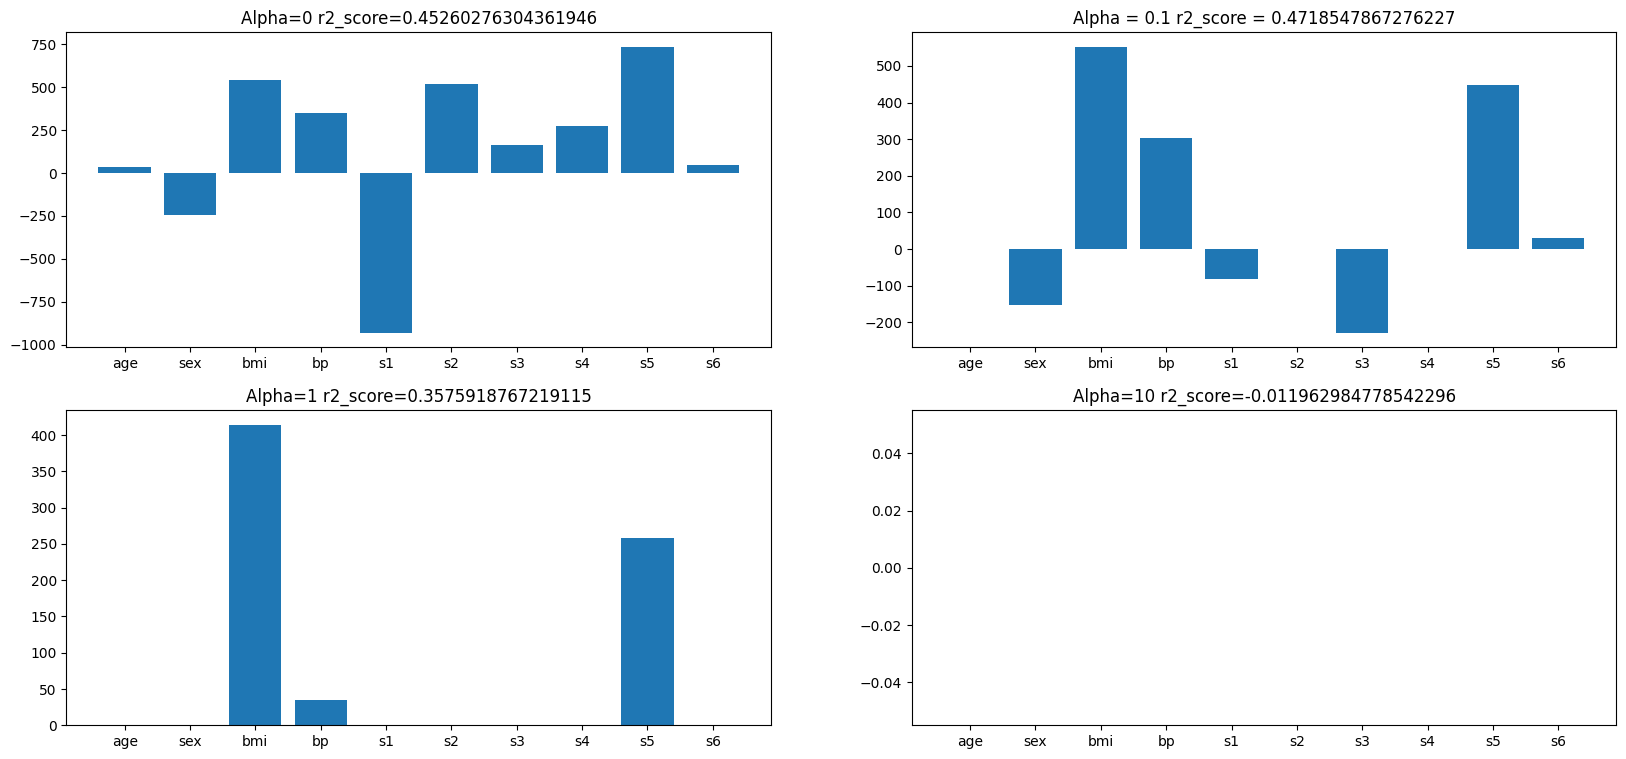

In [24]:
plt.figure(figsize=(20,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title(f"Alpha=0 r2_score={r2_scores[0]}")

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f"Alpha = 0.1 r2_score = {r2_scores[1]}")

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f"Alpha=1 r2_score={r2_scores[2]}")

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f"Alpha=10 r2_score={r2_scores[3]}")

#**Higher coefficients are affected more**

In [25]:
coefs = []
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

for i in alphas:
  L = Lasso(alpha=i)
  L.fit(X_train,y_train)
  coefs.append(L.coef_)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [28]:
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['Alpha'] = alphas
coef_df.set_index('Alpha',inplace=True)
coef_df.head(14)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.0001,37.891667,-241.878244,542.524544,347.624893,-924.832045,513.033268,160.224210,274.036385,733.762619,48.690013
0.0010,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.0100,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
0.1000,0.000000,-152.664779,552.697775,303.365158,-81.365007,-0.000000,-229.255776,0.000000,447.919525,29.642617
1.0000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
